# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import owm_key

# Import citipy to determine the cities based on latitude and longitude
!pip install citipy
from citipy import citipy

# Increase the resolution of the figures
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

ModuleNotFoundError: No module named 'api_keys'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + owm_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_json = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | vila velha
Processing Record 3 of Set 1 | wukari
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | mahibadhoo
Processing Record 9 of Set 1 | clyde river
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | natal
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | port-gentil
Processing Record 16 of Set 1 | lakatoro
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | olafsvik
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | sungaipen

Processing Record 37 of Set 4 | flinders
Processing Record 38 of Set 4 | curup
Processing Record 39 of Set 4 | bubaque
Processing Record 40 of Set 4 | henderson
Processing Record 41 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 4 | asau
Processing Record 43 of Set 4 | chardara
Processing Record 44 of Set 4 | terme
Processing Record 45 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 46 of Set 4 | biak
Processing Record 47 of Set 4 | ducos
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | shuyskoye
Processing Record 0 of Set 5 | kamenka
Processing Record 1 of Set 5 | launceston
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | southampton
Processing Record 4 of Set 5 | goundam
Processing Record 5 of Set 5 | todos santos
Processing Record 6 of Set 5 | mentok
City not found. Skipping...
Processing Record 7 of Set 5 | mallama
City not found. Skipping...
Processing Record 8 of Set 5 | tabor

Processing Record 28 of Set 8 | lompoc
Processing Record 29 of Set 8 | nelson bay
Processing Record 30 of Set 8 | ozu
Processing Record 31 of Set 8 | vlasotince
Processing Record 32 of Set 8 | plettenberg bay
Processing Record 33 of Set 8 | labuhan
Processing Record 34 of Set 8 | barahona
Processing Record 35 of Set 8 | vizinga
Processing Record 36 of Set 8 | puerto escondido
Processing Record 37 of Set 8 | siena
Processing Record 38 of Set 8 | pemangkat
Processing Record 39 of Set 8 | shelburne
Processing Record 40 of Set 8 | hovd
Processing Record 41 of Set 8 | biloela
Processing Record 42 of Set 8 | erdenet
Processing Record 43 of Set 8 | plyussa
Processing Record 44 of Set 8 | camopi
Processing Record 45 of Set 8 | glinka
Processing Record 46 of Set 8 | sirfa
City not found. Skipping...
Processing Record 47 of Set 8 | ilorin
Processing Record 48 of Set 8 | satipo
Processing Record 49 of Set 8 | cao bang
Processing Record 0 of Set 9 | ishikawa
Processing Record 1 of Set 9 | kralendi

Processing Record 13 of Set 12 | alyangula
Processing Record 14 of Set 12 | oistins
Processing Record 15 of Set 12 | shahe
Processing Record 16 of Set 12 | baykit
Processing Record 17 of Set 12 | klaksvik
Processing Record 18 of Set 12 | sadowara
City not found. Skipping...
Processing Record 19 of Set 12 | pochutla
Processing Record 20 of Set 12 | opuwo
Processing Record 21 of Set 12 | kununurra
Processing Record 22 of Set 12 | aykhal
Processing Record 23 of Set 12 | karaul
City not found. Skipping...
Processing Record 24 of Set 12 | enumclaw
Processing Record 25 of Set 12 | vestmannaeyjar
Processing Record 26 of Set 12 | chunskiy
Processing Record 27 of Set 12 | port keats
Processing Record 28 of Set 12 | yumen
Processing Record 29 of Set 12 | erenhot
Processing Record 30 of Set 12 | verkhoyansk
Processing Record 31 of Set 12 | dzerzhinskoye
Processing Record 32 of Set 12 | skelleftea
Processing Record 33 of Set 12 | itoman
Processing Record 34 of Set 12 | paradwip
City not found. Ski

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta do sol,32.6667,-17.1000,16.35,57,44,4.13,PT,1674157119
1,vila velha,-20.3297,-40.2925,27.97,82,40,5.14,BR,1674157119
2,wukari,7.8500,9.7833,27.06,21,40,2.30,NG,1674156967
3,hermanus,-34.4187,19.2345,18.78,88,2,1.51,ZA,1674157119
4,san patricio,28.0170,-97.5169,23.97,21,89,4.67,US,1674157120


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

city_data_df.rename(columns = {"Max Temp": "Max Temp (C)",
                               "Humidity": "Humidity (%)",
                               "Cloudiness": "Cloudiness (%)",
                               "Wind Speed": "Wind Speed (m/s)"},
                    inplace = True)

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,ponta do sol,32.6667,-17.1000,16.35,57,44,4.13,PT,1674157119
1,vila velha,-20.3297,-40.2925,27.97,82,40,5.14,BR,1674157119
2,wukari,7.8500,9.7833,27.06,21,40,2.30,NG,1674156967
3,hermanus,-34.4187,19.2345,18.78,88,2,1.51,ZA,1674157119
4,san patricio,28.0170,-97.5169,23.97,21,89,4.67,US,1674157120


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

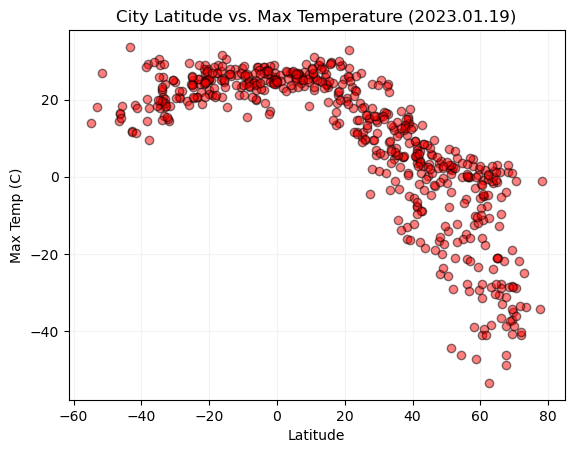

In [3]:
# Incorporate the other graph properties
plt.axes().set_axisbelow(True)
plt.grid(color='0.95')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("City Latitude vs. Max Temperature (2023.01.19)")

# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp (C)"]

plt.scatter(
    x, 
    y,
    marker="o",
    facecolors="red",
    edgecolors="black",
    alpha=0.5,
    )

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

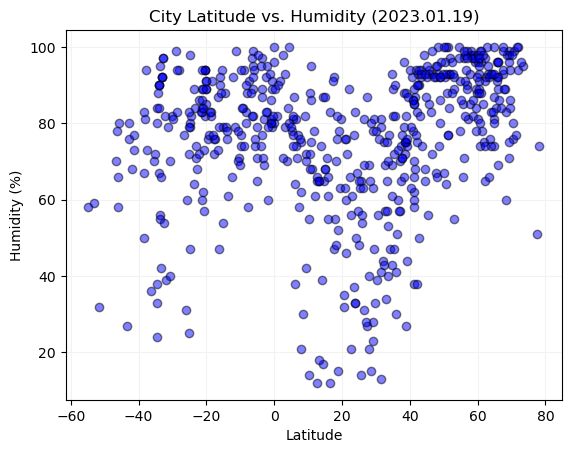

In [4]:
# Incorporate the other graph properties
plt.axes().set_axisbelow(True)
plt.grid(color='0.95')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023.01.19)")

# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity (%)"]

plt.scatter(
    x, 
    y,
    marker="o",
    facecolors="blue",
    edgecolors="black",
    alpha=0.5,
    )

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

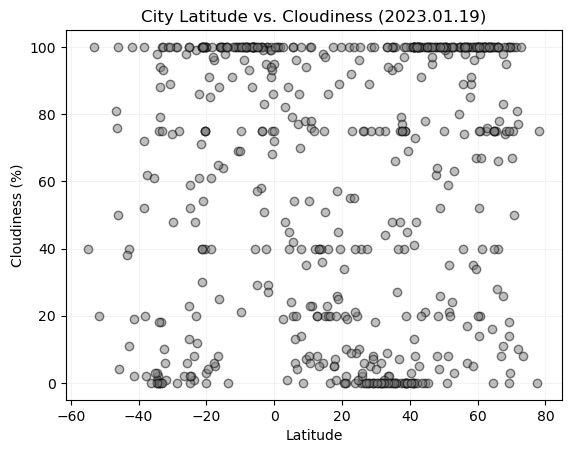

In [5]:
# Incorporate the other graph properties
plt.axes().set_axisbelow(True)
plt.grid(color='0.95')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023.01.19)")

# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Cloudiness (%)"]

plt.scatter(
    x, 
    y,
    marker="o",
    facecolors="grey",
    edgecolors="black",
    alpha=0.5,
    )

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

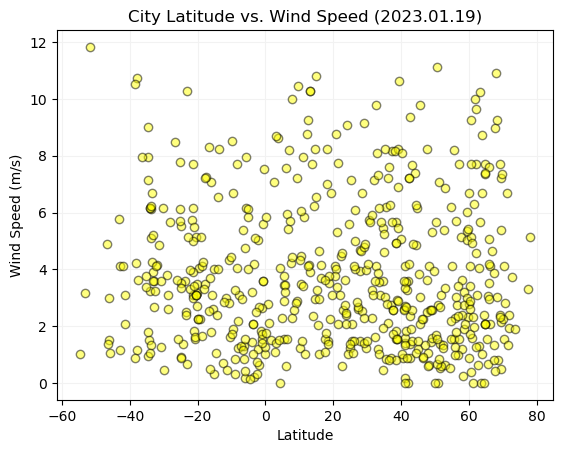

In [6]:
# Incorporate the other graph properties
plt.axes().set_axisbelow(True)
plt.grid(color='0.95')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023.01.19)")

# Build the scatter plots for latitude vs. humidity
y = city_data_df["Wind Speed (m/s)"]

plt.scatter(
    x, 
    y,
    marker="o",
    facecolors="yellow",
    edgecolors="black",
    alpha=0.5,
    )

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [11]:
# Define a function to create Linear Regression plots
def regr(y_col, hemi):   
    if hemi == "N":
        hemi_df = northern_hemi_df
        hemi_title = "Northern Hemisphere"
        plt.title(f"{hemi_title}: {y_col} vs. Latitude")
        color = "blue"
    elif hemi == "S":
        hemi_df = southern_hemi_df
        hemi_title = "Southern Hemisphere"
        plt.title(f"{hemi_title}: {y_col} vs. Absolute Latitude")
        color = "red"
    
    x = hemi_df["Lat"]
    y = hemi_df[y_col]
    
    plt.xlabel("Latitude")
    plt.ylabel(y_col)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept   
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x, y, facecolors=color, alpha=0.1)
    plt.plot(x, regress_values, color="black", linewidth=0.8)
    
    if slope > 0:
        plt.annotate(
            line_eq,
            xy=(x.min(),regress_values.min()),
            xycoords="data",
            xytext=(0,-15),
            textcoords="offset pixels",
            fontsize=11.5,
            color="black"
        )
    else:
        plt.annotate(
            line_eq,
            xy=(x.max(),regress_values.min()),
            xycoords="data",
            xytext=(-140,-20),
            textcoords="offset pixels",
            fontsize=11.5,
            color="black"
        )

    print(f"The r-value is {rvalue}")

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,ponta do sol,32.6667,-17.1000,16.35,57,44,4.13,PT,1674157119
2,wukari,7.8500,9.7833,27.06,21,40,2.30,NG,1674156967
4,san patricio,28.0170,-97.5169,23.97,21,89,4.67,US,1674157120
7,mahibadhoo,3.7833,72.9667,26.89,70,1,8.62,MV,1674157121
8,clyde river,70.4692,-68.5914,-28.87,76,100,1.54,CA,1674157034


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
1,vila velha,-20.3297,-40.2925,27.97,82,40,5.14,BR,1674157119
3,hermanus,-34.4187,19.2345,18.78,88,2,1.51,ZA,1674157119
5,hobart,-42.8794,147.3294,11.92,80,40,4.12,AU,1674157092
6,rikitea,-23.1203,-134.9692,25.32,71,99,0.66,PF,1674157120
10,busselton,-33.6500,115.3333,19.45,56,79,6.13,AU,1674157121


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8314493980187507


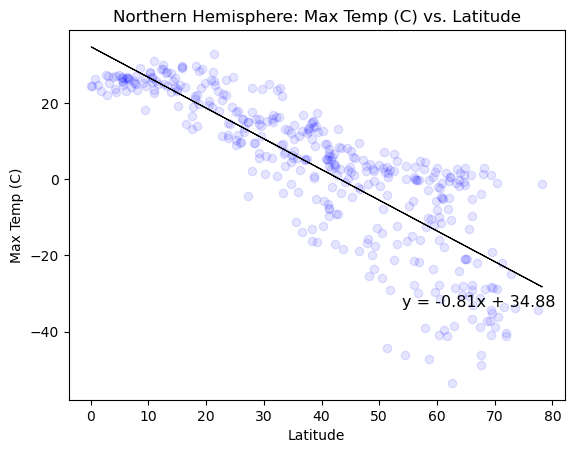

In [12]:
# Max Temp, Northern Hemisphere
regr("Max Temp (C)", "N")

The r-value is 0.4514454732373651


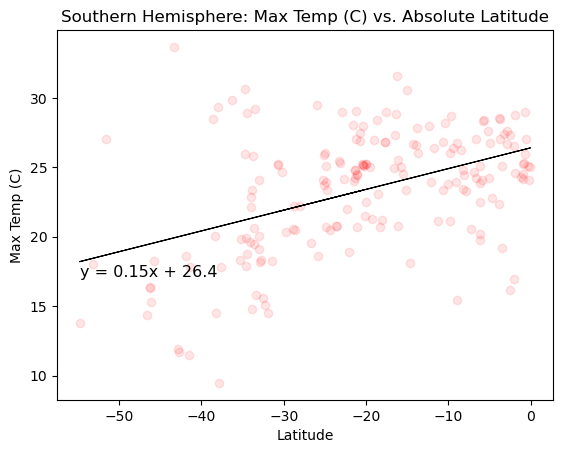

In [13]:
# Max Temp, Southern Hemisphere 
regr("Max Temp (C)", "S")

**Discussion about the linear relationship:** 

In both hemispheres, there is a negative (inverse) correlation between temperature and _absolute value_ of latitude. In other words, as absolute latitude increases temperature decreases, and vice versa. This is common sense. 

However, the data yield two more surprising insights. First, Northern Hemisphere data contain significantly less variation than Southern Hemisphere data, and the linear correlation (r-value) is stronger for the former compared to the latter. Second, the rate of change (slope) of latitude vs. temperature is more dramatic for the Northern Hemisphere compared to the Southern Hemisphere. As a topic for further investigation, we could query the impact of summer and winter seasons on these last two insights.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.46071856644324916


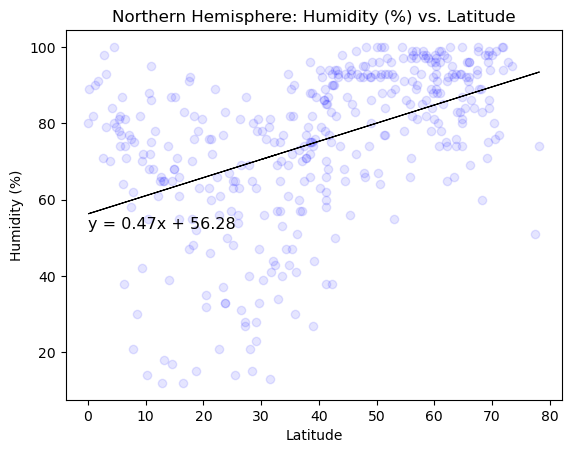

In [14]:
# Humidity, Northern Hemisphere
regr("Humidity (%)", "N")

The r-value is 0.36718467764400564


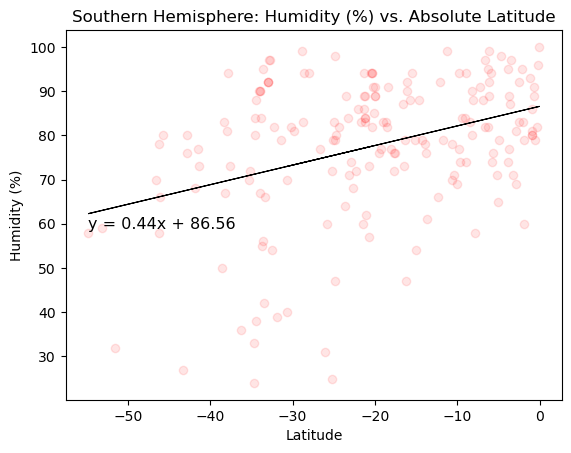

In [15]:
# Humidity, Southern Hemisphere
regr("Humidity (%)", "S")

**Discussion about the linear relationship:** In the Northern Hemisphere, humidity increases as you move further away from the equator. In the Southern Hemisphere, humidity decreases as you move further away from the equator. Correlation between humidity and latitude is marginally stronger in the Northern Hemisphere than it is in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.29036822970464277


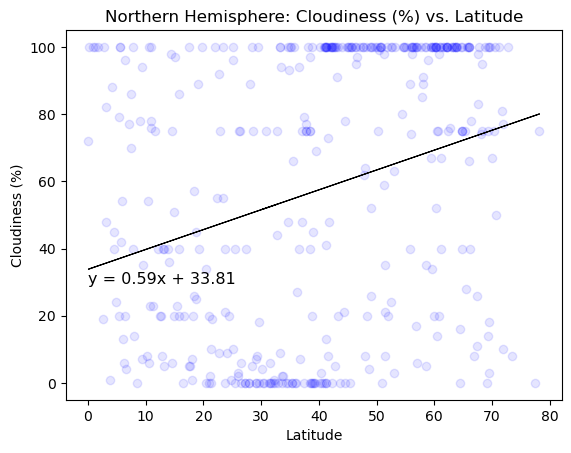

In [16]:
# Cloudiness, Northern Hemisphere
regr("Cloudiness (%)", "N")

The r-value is 0.41305203538272034


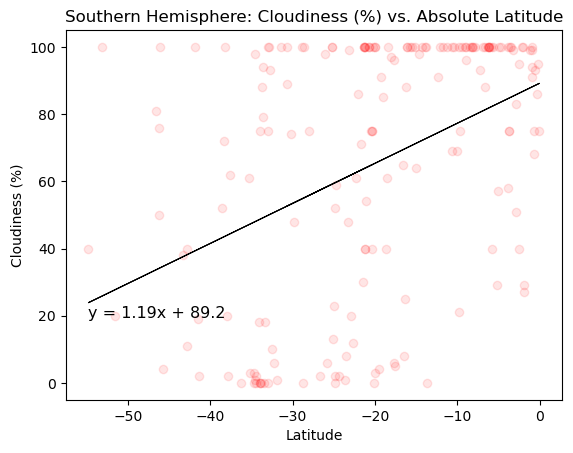

In [17]:
# Cloudiness, Southern Hemisphere
regr("Cloudiness (%)", "S")

**Discussion about the linear relationship:** In the Northern Hemisphere, cloudiness increases as you move further away from the equator. In the Southern Hemisphere, cloudiness decreases as you move further away from the equator. Correlation between cloudiness and latitude is marginally stronger in the Southern Hemisphere than it is in the Northern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.09221915925184118


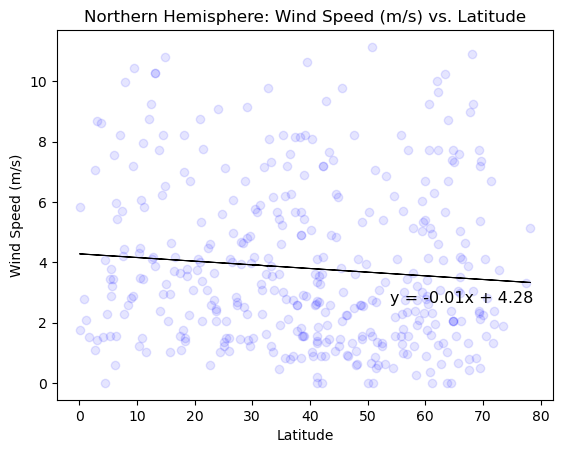

In [18]:
# Wind Speed, Northern Hemisphere
regr("Wind Speed (m/s)", "N")

The r-value is -0.20604556347897623


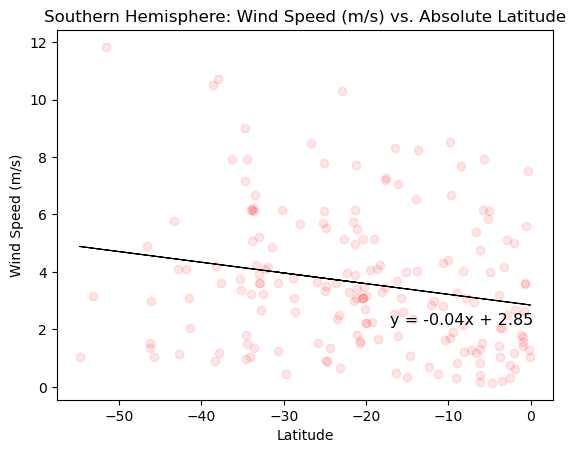

In [19]:
# Wind Speed, Southern Hemisphere
regr("Wind Speed (m/s)", "S")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a very weak correlation between wind speed and latitude, thus no significant insights can be drawn. In the Southern Hemisphere, wind speed increases very gradually as you move further from the equator. This insight is tentative, however, due to the relatively weak correlation between variables.